In [96]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [97]:
classes = {
    0:"L",
    1:"O",
    2:"V",
    3:"E"
}

In [98]:
x=torch.Tensor([
    [[1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,1,1,1,1]],
    [[1,1,1,1,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,1,1,1,1]],
    [[1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [0,1,0,1,0],
    [0,0,1,0,0]],
    [[1,1,1,1,1],
    [1,0,0,0,0],
    [1,1,1,1,1],
    [1,0,0,0,0],
    [1,1,1,1,1]],
])

In [99]:
x

tensor([[[1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 0., 0., 0., 1.],
         [1., 0., 0., 0., 1.],
         [1., 0., 0., 0., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 0., 0., 0., 1.],
         [1., 0., 0., 0., 1.],
         [1., 0., 0., 0., 1.],
         [0., 1., 0., 1., 0.],
         [0., 0., 1., 0., 0.]],

        [[1., 1., 1., 1., 1.],
         [1., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1.],
         [1., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1.]]])

In [100]:
x.dtype

torch.float32

In [101]:
torch.tensor([1,2,3]).dtype

torch.int64

In [102]:
y = torch.Tensor([0,1,2,3]).long()
y

tensor([0, 1, 2, 3])

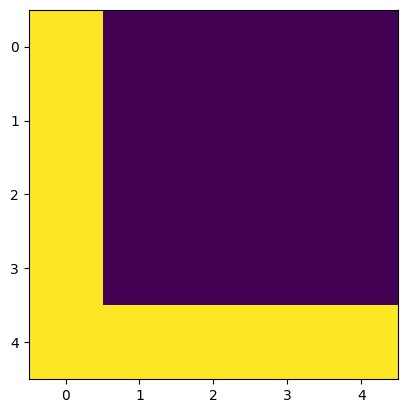

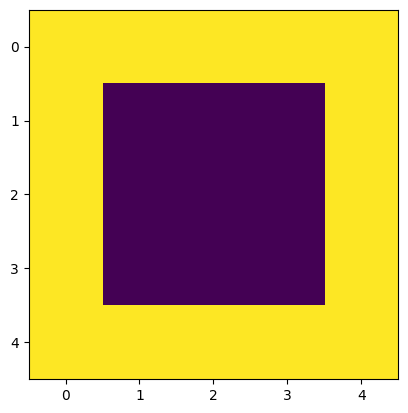

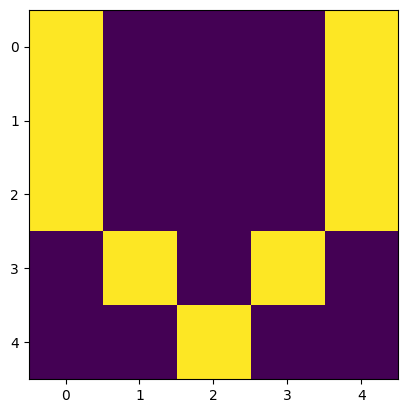

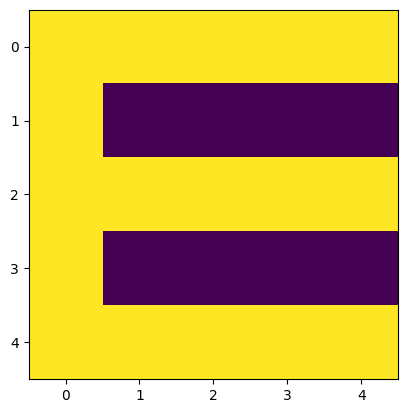

In [103]:
for i in range(x.shape[0]):
    plt.imshow(x[i])
    plt.show()

In [104]:
import torch.nn as nn
import torch.nn.functional as F

In [105]:
class Dense(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(25,36)
        self.fc2 = nn.Linear(36,36)
        self.fc3 = nn.Linear(36,4)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))        
        x = self.fc3(x)
        return x

In [106]:
net = Dense()

In [107]:
net(x.view(-1,25))

tensor([[ 0.1273, -0.0133, -0.0318,  0.1725],
        [ 0.2002,  0.0042, -0.0398,  0.2103],
        [ 0.1352, -0.0070, -0.0167,  0.2050],
        [ 0.2271, -0.0505,  0.0027,  0.2881]], grad_fn=<AddmmBackward0>)

In [108]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=0.001)
epochs = 100

In [109]:
losses = []

In [110]:
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(x.view(-1,25))
    loss = loss_fn(outputs,y)
    loss.backward()
    optimizer.step()

    losses.append(loss.to('cpu').detach().numpy().copy())
    if epoch %10 == 9:
        print(f"ecpoch : {epoch+1} loss : {round(loss.item(),3)}")

ecpoch : 10 loss : 1.314
ecpoch : 20 loss : 1.235
ecpoch : 30 loss : 1.138
ecpoch : 40 loss : 1.01
ecpoch : 50 loss : 0.851
ecpoch : 60 loss : 0.667
ecpoch : 70 loss : 0.476
ecpoch : 80 loss : 0.311
ecpoch : 90 loss : 0.19
ecpoch : 100 loss : 0.116


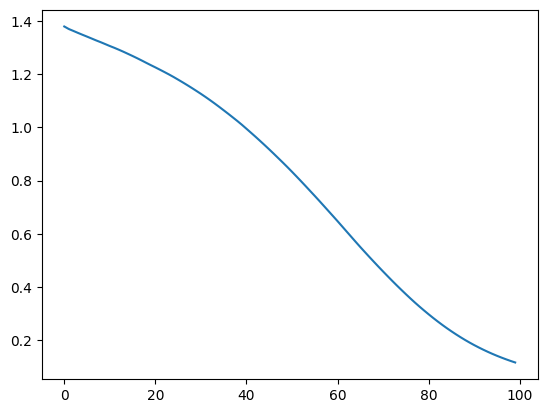

In [111]:
plt.plot(losses)
plt.show()

In [112]:
lists=torch.Tensor([
    [[1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,1,1,1,1]],
    [[1,1,1,1,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,1,1,1,1]],
    [[1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [0,1,0,1,0],
    [0,0,1,0,0]],
    [[1,1,1,1,1],
    [1,0,0,0,0],
    [1,1,1,1,1],
    [1,0,0,0,0],
    [1,1,1,1,1]],
])

In [142]:
L=torch.Tensor(
    [[1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,1],
    [1,0,1,0,1],
    [0,1,1,1,1]])

In [143]:
classes[net(L.view(-1,25)).max(dim=1)[1].item()]

'V'